In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub
from matplotlib import pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle

import h5py



In [2]:
pip install matplotlib


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.4/7.6 MB 11.9 MB/s eta 0:00:01
     --- ------------------------------------ 0.7/7.6 MB 10.6 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/7.6 MB 6.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/7.6 MB 6.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.6 MB 6.8 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.6 MB 6.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.6 MB 6.0 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/7.6 MB 6.1 MB/s eta 0:00:01
     ------------ --------------------------- 2.3/7.6 MB 5.9 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.6 MB 5.8 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 5.9 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.6 MB 5.6 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.4/7.6 MB 11.9 MB/s eta 0:00:01
     --- ------------------------------------ 0.7/7.6 MB 10.6 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/7.6 MB 6.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/7.6 MB 6.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.6 MB 6.8 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.6 MB 6.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.6 MB 6.0 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/7.6 MB 6.1 MB/s eta 0:00:01
     ------------ --------------------------- 2.3/7.6 MB 5.9 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.6 MB 5.8 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 5.9 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.6 MB 5.6 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\MSI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## making labels and creating filenames in array

In [93]:
labels_csv = pd.read_csv("crnAndName.csv")
print(labels_csv.describe())
print(labels_csv.head())

                 CRN        Full Name
count             48               48
unique            48               48
top     KCE074BCT001  AAKASH SHRESTHA
freq               1                1
            CRN          Full Name
0  KCE074BCT001    AAKASH SHRESTHA
1  KCE074BCT002  AAKASH RAJ DHAKAL
2  KCE074BCT003     AAKRITI AGANJA
3  KCE074BCT004     AAYUSH MUSYAJU
4  KCE074BCT005      ABHINAV ARYAL


In [94]:
# convert labels column to NumPy array
unique_labels=labels_csv['CRN'].to_numpy()
unique_labels

array(['KCE074BCT001', 'KCE074BCT002', 'KCE074BCT003', 'KCE074BCT004',
       'KCE074BCT005', 'KCE074BCT006', 'KCE074BCT007', 'KCE074BCT008',
       'KCE074BCT009', 'KCE074BCT010', 'KCE074BCT011', 'KCE074BCT012',
       'KCE074BCT013', 'KCE074BCT014', 'KCE074BCT015', 'KCE074BCT016',
       'KCE074BCT017', 'KCE074BCT018', 'KCE074BCT019', 'KCE074BCT020',
       'KCE074BCT021', 'KCE074BCT022', 'KCE074BCT023', 'KCE074BCT024',
       'KCE074BCT025', 'KCE074BCT026', 'KCE074BCT027', 'KCE074BCT028',
       'KCE074BCT029', 'KCE074BCT030', 'KCE074BCT031', 'KCE074BCT032',
       'KCE074BCT033', 'KCE074BCT034', 'KCE074BCT035', 'KCE074BCT036',
       'KCE074BCT037', 'KCE074BCT038', 'KCE074BCT039', 'KCE074BCT040',
       'KCE074BCT041', 'KCE074BCT042', 'KCE074BCT043', 'KCE074BCT044',
       'KCE074BCT045', 'KCE074BCT046', 'KCE074BCT047', 'KCE074BCT048'],
      dtype=object)

In [95]:
import os
filedir=["data/"+crn for crn in unique_labels]
filedir[:5]

['data/KCE074BCT001',
 'data/KCE074BCT002',
 'data/KCE074BCT003',
 'data/KCE074BCT004',
 'data/KCE074BCT005']

In [96]:
filenames=[]
labels=[]
for dir in filedir:
    files=os.listdir(dir)
    for file in files:
        filetemp=dir+'/'+file
        filenames.append(filetemp)
        labels.append(dir[5:])

In [97]:
#checking files and labels available
print(len(filenames))
len((labels))

12412


12412

In [98]:
#checking labels and file name
print(filenames[:5])
print(labels[:5])

['data/KCE074BCT001/1.jpg', 'data/KCE074BCT001/1_B_0.125.jpg', 'data/KCE074BCT001/1_B_0.25.jpg', 'data/KCE074BCT001/1_B_0.375.jpg', 'data/KCE074BCT001/1_B_0.5.jpg']
['KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001', 'KCE074BCT001']


In [99]:
np_labels=np.asarray(labels)
print(np_labels)
type(np_labels)

['KCE074BCT001' 'KCE074BCT001' 'KCE074BCT001' ... 'KCE074BCT048'
 'KCE074BCT048' 'KCE074BCT048']


numpy.ndarray

In [100]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_labels # use comparison operator to create boolean array

KCE074BCT001


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [101]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[-2:]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True])]

In [102]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

KCE074BCT001
0
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


## creating validation list in small data

In [103]:
# Setup X & y variables
X = filenames
y = np_labels

In [104]:
# Set number of images to use for experimenting
NUM_IMAGES = 500 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

500

In [105]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                 random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(9929, 9929, 2483, 2483)

In [106]:
X_train[:5], y_train[:5]

(['data/KCE074BCT043/4_R_80.jpg',
  'data/KCE074BCT005/2_B_0.625.jpg',
  'data/KCE074BCT024/6_B_1.0.jpg',
  'data/KCE074BCT007/5_hf.jpg',
  'data/KCE074BCT026/1_C_0.25.jpg'],
 array(['KCE074BCT043', 'KCE074BCT005', 'KCE074BCT024', 'KCE074BCT007',
        'KCE074BCT026'], dtype='<U12'))

## Preprocessing images (turning images into Tensors)

In [107]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0]) # read in an image
image.shape

(207, 172, 3)

In [108]:
#tf.constant convert list into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 172, 3), dtype=uint8, numpy=
array([[[159, 168, 177],
        [160, 169, 178],
        [159, 166, 174],
        ...,
        [ 32,  33,  37],
        [ 32,  33,  37],
        [ 32,  33,  37]],

       [[155, 164, 173],
        [155, 164, 173],
        [154, 161, 169],
        ...,
        [ 31,  32,  36],
        [ 31,  32,  36],
        [ 31,  32,  36]]], dtype=uint8)>

In [109]:
# Define image size
IMG_SIZE = 160

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Creating data batches

In [110]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [111]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))# filenames                                                 
        data = data.shuffle(buffer_size=len(x))
# Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [112]:
# Create training and validation data batches
train_data = create_data_batches(X_train,test_data=True)
val_data = create_data_batches(X_val,test_data=True)

Creating test data batches...
Creating test data batches...


In [113]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None))

## Visualizing data batches

In [114]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")

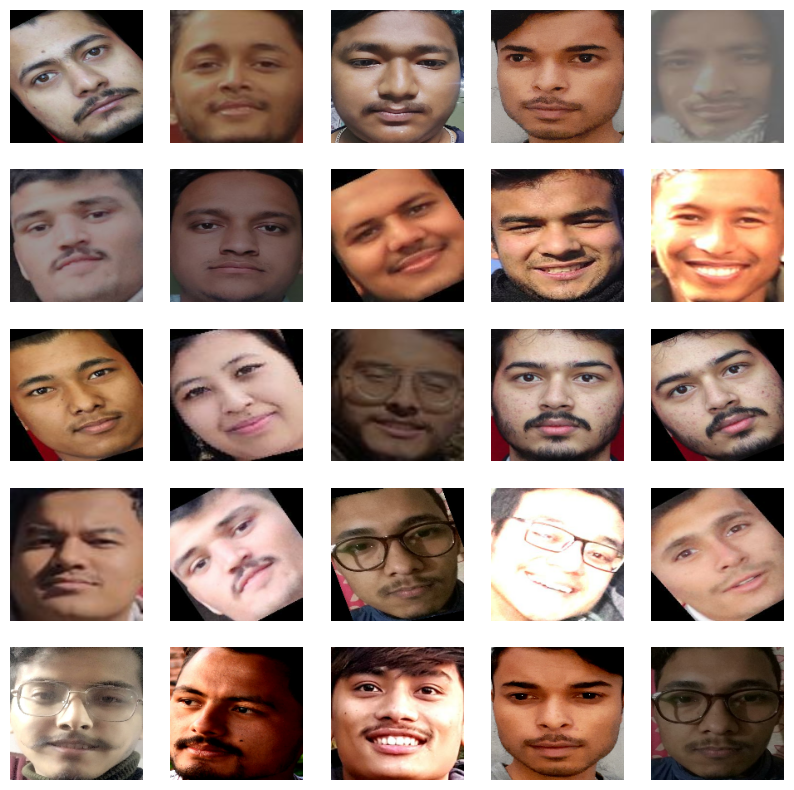

In [115]:
# Visualize training images from the training data batch
train_images = next(train_data.as_numpy_iterator())
show_25_images(train_images)

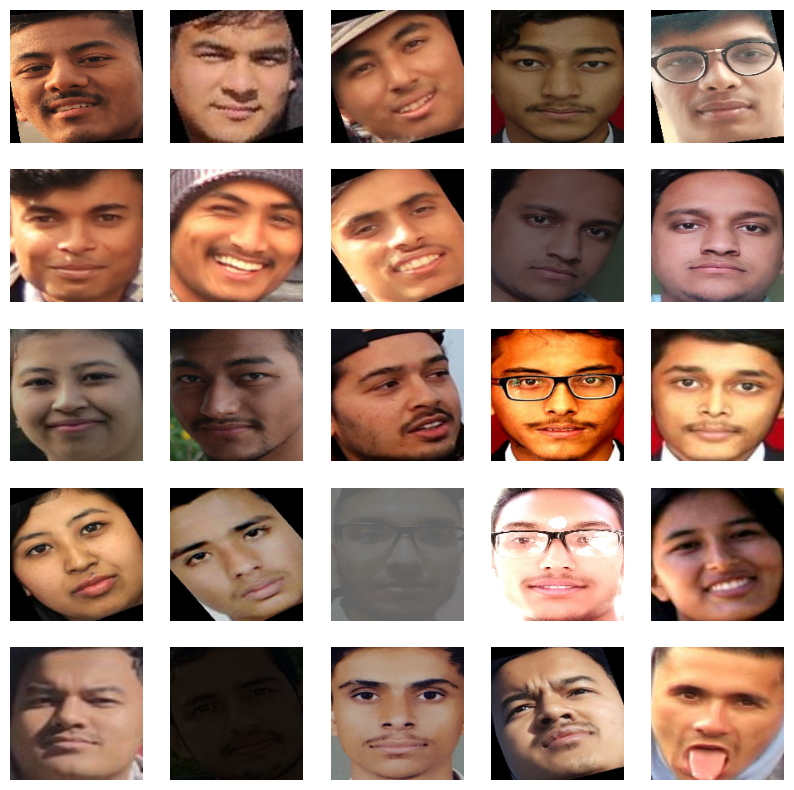

In [116]:
# Visualize validation images from the validation data batch
val_images=next(val_data.as_numpy_iterator())
show_25_images(val_images)

## Building a model

In [117]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [118]:
INPUT_SHAPE

[None, 160, 160, 3]

In [131]:
#find embeddings
#find embeddings
from keras.models import load_model

model = h5py.File("model/facenet_keras.h5")
X_train_emb = model.predict(train_data)
X_val_emb = model.predict(val_data)

AttributeError: 'File' object has no attribute 'predict'

In [120]:
# we have embedding of images
X_train_emb.shape

NameError: name 'X_train_emb' is not defined

In [ ]:
X_val_emb.shape

NameError: name 'X_val_emb' is not defined

In [ ]:
X_train_emb

NameError: name 'X_train_emb' is not defined

In [ ]:
X_val_emb

NameError: name 'X_val_emb' is not defined

## now svc 

In [ ]:
#normalize the embedded data
in_encode = Normalizer(norm='l2')
X_train_emb_nom = in_encode.transform(X_train_emb)
X_val_emb_nom = in_encode.transform(X_val_emb)

NameError: name 'X_train_emb' is not defined

In [ ]:
X_train_emb_nom,X_train_emb_nom.shape,type(X_train_emb_nom)

(array([[-0.10580423,  0.04116936, -0.04501477, ..., -0.02824975,
         -0.00170633,  0.07346803],
        [ 0.09602308,  0.02797719, -0.13877654, ..., -0.15006691,
          0.06321924, -0.17636333],
        [ 0.0061334 , -0.10335203, -0.09640437, ..., -0.09228862,
          0.03509171,  0.15720001],
        ...,
        [-0.0293755 ,  0.13476926,  0.05595978, ..., -0.08150491,
         -0.07403052,  0.0055717 ],
        [ 0.03469625,  0.06618605, -0.0243761 , ..., -0.13233142,
          0.03786987, -0.02856647],
        [ 0.09918519, -0.12610342, -0.07679081, ..., -0.13225527,
          0.04043853, -0.06128534]], dtype=float32),
 (9926, 128),
 numpy.ndarray)

In [ ]:
y_train

array(['KCE074BCT043', 'KCE074BCT005', 'KCE074BCT024', ...,
       'KCE074BCT022', 'KCE074BCT004', 'KCE074BCT028'], dtype='<U12')

In [ ]:
#define svm classifier model new variable C=CLoseness aaded
model_svc =SVC(kernel='poly',degree=5, probability=True,C=100)
model_svc.fit(X_train_emb_nom,y_train)

SVC(C=100, degree=5, kernel='poly', probability=True)

In [ ]:
model_svc.score(X_train_emb_nom,y_train)

0.9976828531130365

In [ ]:
model_svc.score(X_val_emb_nom,y_val)

0.9721998388396454

In [ ]:
y_preds=model_svc.predict(X_val_emb_nom)

NameError: name 'model_svc' is not defined

In [ ]:
model_svc.get_params()

NameError: name 'model_svc' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': ['balanced',None],'C': [ 1,10,100,200]}
model_svc_best=GridSearchCV(estimator=model_svc,param_grid=grid,cv=5,verbose=2)
model_svc_best.fit(X_train_emb_nom,y_train)

NameError: name 'model_svc' is not defined

In [ ]:
model_svc_best.best_estimator_

SVC(C=200, degree=5, kernel='poly', probability=True)

In [ ]:
from sklearn.metrics import precision_score
## precesion=tp / (tp + fp)
print(precision_score(y_val, y_preds, average='macro'))
print(precision_score(y_val, y_preds, average='micro'))
print(precision_score(y_val, y_preds, average='weighted'))

0.972597125885372
0.9721998388396454
0.9726728280470462


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_val, y_preds, average='macro'))
print(recall_score(y_val, y_preds, average='micro'))
print(recall_score(y_val, y_preds, average='weighted'))

0.9722506492002855
0.9721998388396454
0.9721998388396454


In [ ]:
#F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
print(f1_score(y_val, y_preds, average='macro'))
print(f1_score(y_val, y_preds, average='micro'))
print(f1_score(y_val, y_preds, average='weighted'))

0.9721042126211897
0.9721998388396454
0.9721136986139151


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat=confusion_matrix(y_val,y_preds)
print('Confusion matrix : \n',conf_mat)

Confusion matrix : 
 [[57  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  0]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  1]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  1 66]]


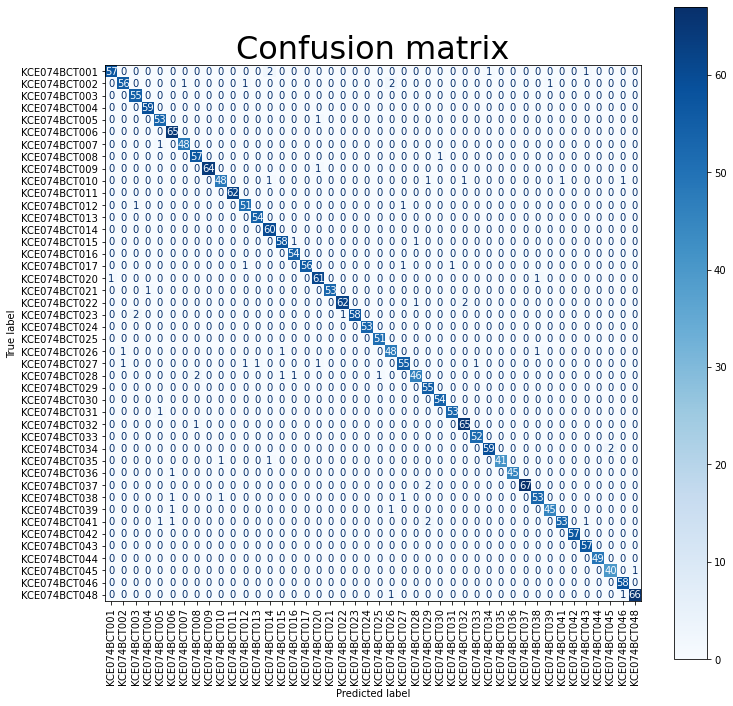

In [ ]:
from sklearn.metrics import plot_confusion_matrix
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(model_svc, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# RANDOM FOREST

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
randomforest=RandomForestClassifier(n_estimators=10)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
randomforest.fit(X_train_emb_nom,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
#predict
y_preds_rf=randomforest.predict(X_val_emb_nom)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_rf))

Accuracy: 0.9262691377921032


In [ ]:
#precision 
print(precision_score(y_val, y_preds_rf, average='macro'))
print(precision_score(y_val, y_preds_rf, average='micro'))
print(precision_score(y_val, y_preds_rf, average='weighted'))

0.9289989042788633
0.9262691377921032
0.928804380734723


In [ ]:
print(recall_score(y_val, y_preds_rf, average='macro'))
print(recall_score(y_val, y_preds_rf, average='micro'))
print(recall_score(y_val, y_preds_rf, average='weighted'))

0.927220862181141
0.9262691377921032
0.9262691377921032


In [ ]:
print(f1_score(y_val, y_preds_rf, average='macro'))
print(f1_score(y_val, y_preds_rf, average='micro'))
print(f1_score(y_val, y_preds_rf, average='weighted'))

0.9268636307631101
0.9262691377921032
0.9262678354153878


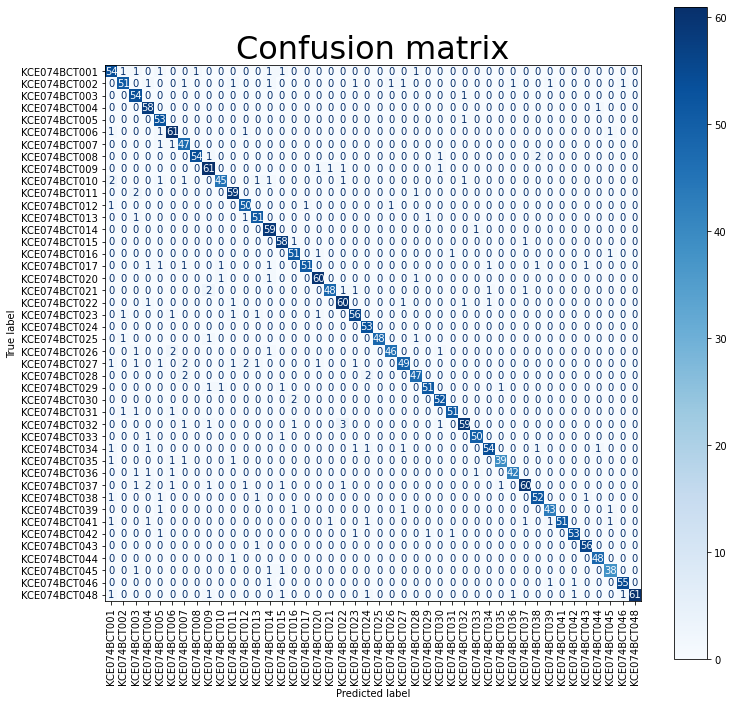

In [ ]:
title= "Confusion matrix"
fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(randomforest, X_val_emb_nom, y_val,cmap=plt.cm.Blues,ax=ax)
plt.title(title,fontsize=32)
plt.xticks(rotation='vertical')
plt.show()

# Knn algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnNeigh = KNeighborsClassifier(n_neighbors=5)
knnNeigh.fit(X_train_emb_nom,y_train)

KNeighborsClassifier()

In [ ]:
y_preds_knn=knnNeigh.predict(X_val_emb_nom)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_knn))

Accuracy: 0.9323126510878323


In [ ]:
#precision 
print(precision_score(y_val, y_preds_knn, average='macro'))
print(precision_score(y_val, y_preds_knn, average='micro'))
print(precision_score(y_val, y_preds_knn, average='weighted'))

0.9370220484673267
0.9323126510878323
0.9372782034619666


In [ ]:
##recall
print(recall_score(y_val, y_preds_knn, average='macro'))
print(recall_score(y_val, y_preds_knn, average='micro'))
print(recall_score(y_val, y_preds_knn, average='weighted'))

0.9330132289034118
0.9323126510878323
0.9323126510878323


In [ ]:
#f1 score
print(f1_score(y_val, y_preds_knn, average='macro'))
print(f1_score(y_val, y_preds_knn, average='micro'))
print(f1_score(y_val, y_preds_knn, average='weighted'))

0.9333411607878712
0.9323126510878323
0.9331514450320787


# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(random_state=0,penalty='l2').fit(X_train_emb_nom,y_train)
y_preds_lr=logisticReg.predict(X_val_emb_nom)
print("Accuracy:",metrics.accuracy_score(y_val, y_preds_lr))

Accuracy: 0.919822723609992


In [ ]:
#precision 
print(precision_score(y_val, y_preds_lr, average='macro'))
print(precision_score(y_val, y_preds_lr, average='micro'))
print(precision_score(y_val, y_preds_lr, average='weighted'))

0.9402101919747704
0.919822723609992
0.9414377347729039


In [ ]:
##recall
print(recall_score(y_val, y_preds_lr, average='macro'))
print(recall_score(y_val, y_preds_lr, average='micro'))
print(recall_score(y_val, y_preds_lr, average='weighted'))

0.9210542057734884
0.919822723609992
0.919822723609992


In [ ]:
#f1 score
print(f1_score(y_val, y_preds_lr, average='macro'))
print(f1_score(y_val, y_preds_lr, average='micro'))
print(f1_score(y_val, y_preds_lr, average='weighted'))

0.9263456817543934
0.919822723609992
0.9264131332546609


# Check on Sample Image

In [ ]:
image=process_image('1.jpg')

In [ ]:
image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[0.08583333, 0.0779902 , 0.0897549 ],
        [0.07884774, 0.0710046 , 0.0827693 ],
        [0.07487746, 0.06703432, 0.07879902],
        ...,
        [0.21632048, 0.16252145, 0.15823224],
        [0.23607774, 0.19294049, 0.18509735],
        [0.25004902, 0.20691179, 0.19906865]],

       [[0.08102942, 0.07318628, 0.08495098],
        [0.07732844, 0.0694853 , 0.08125   ],
        [0.07355393, 0.06571079, 0.0774755 ],
        ...,
        [0.20644456, 0.1522733 , 0.14810815],
        [0.20538849, 0.15828063, 0.15176103],
        [0.20779413, 0.16068628, 0.15416667]],

       [[0.07622549, 0.06838235, 0.08014706],
        [0.07252452, 0.06468138, 0.07644609],
        [0.07074908, 0.06290594, 0.07467065],
        ...,
        [0.21222429, 0.15732232, 0.15340075],
        [0.21597742, 0.16107544, 0.15715387],
        [0.20441177, 0.14950982, 0.14558825]],

       ...,

       [[0.08063726, 0.08455883, 0.09240197],
        [0.07

In [ ]:
image_1=tf.expand_dims(image, axis=0)

In [ ]:
image_1

<tf.Tensor: shape=(1, 160, 160, 3), dtype=float32, numpy=
array([[[[0.08583333, 0.0779902 , 0.0897549 ],
         [0.07884774, 0.0710046 , 0.0827693 ],
         [0.07487746, 0.06703432, 0.07879902],
         ...,
         [0.21632048, 0.16252145, 0.15823224],
         [0.23607774, 0.19294049, 0.18509735],
         [0.25004902, 0.20691179, 0.19906865]],

        [[0.08102942, 0.07318628, 0.08495098],
         [0.07732844, 0.0694853 , 0.08125   ],
         [0.07355393, 0.06571079, 0.0774755 ],
         ...,
         [0.20644456, 0.1522733 , 0.14810815],
         [0.20538849, 0.15828063, 0.15176103],
         [0.20779413, 0.16068628, 0.15416667]],

        [[0.07622549, 0.06838235, 0.08014706],
         [0.07252452, 0.06468138, 0.07644609],
         [0.07074908, 0.06290594, 0.07467065],
         ...,
         [0.21222429, 0.15732232, 0.15340075],
         [0.21597742, 0.16107544, 0.15715387],
         [0.20441177, 0.14950982, 0.14558825]],

        ...,

        [[0.08063726, 0.08455883, 

In [ ]:
image_data=model.predict(image_1)

In [ ]:
image_data

array([[ 0.21008334,  1.0165343 ,  0.9471274 ,  1.9319386 , -2.0069697 ,
         0.7224956 , -0.6939493 , -0.15844825,  1.1035749 , -0.49693006,
         1.0073403 , -0.5918253 ,  1.0029409 , -1.0591623 , -0.6489141 ,
         1.7130888 , -0.43762353,  0.9184412 ,  0.40546525,  0.80943465,
         0.5608685 ,  0.7384958 ,  1.7410512 , -0.436122  ,  0.02993262,
        -0.68134594,  0.0406158 ,  0.08236709, -1.6350818 , -1.0771338 ,
        -2.7356067 , -0.43008062, -1.1369911 , -0.10137394,  2.2327075 ,
         0.2527727 ,  0.11320405,  0.09922782,  0.7526818 ,  0.7477026 ,
         0.76163536,  0.347556  ,  0.44998735, -1.1598259 ,  0.9997831 ,
         0.4490977 ,  0.41108903, -0.25401142,  1.8495762 ,  2.2205772 ,
        -0.18240115, -0.27768484,  1.3830029 , -0.14096403,  0.951682  ,
        -0.02425618,  0.65787464, -0.11924523,  1.3659456 ,  0.7856891 ,
         1.9367404 ,  0.6309222 ,  0.84766126, -0.2438002 ,  0.88329595,
        -0.5761045 ,  0.8527047 , -0.29788584, -2.0

In [ ]:
in_encode = Normalizer(norm='l2')
image_nom = in_encode.transform(image_data)

In [ ]:
raw_predict=model_svc.predict_proba(image_nom)
percent=raw_predict[0]*100
percent.astype(int)

array([ 1,  2,  2,  1,  1,  7,  0,  1,  2,  2,  0,  2,  1,  1,  1, 10,  2,
        2,  2,  4, 12,  0,  1,  1,  2,  2,  0,  2,  1,  2,  1,  0,  1,  0,
        1,  0,  6,  0,  1,  0,  3,  1,  0,  0])

In [ ]:
if raw_predict.max()>0.2:
    result=model_svc.predict(image_nom)
else:
    result="no"

In [ ]:
result

'no'

In [ ]:
randomforest.predict(image_nom)

array(['KCE074BCT006'], dtype='<U12')

In [ ]:
randomforest.predict_proba(image_nom)

array([[0. , 0. , 0. , 0. , 0. , 0.2, 0.1, 0. , 0. , 0. , 0.1, 0. , 0.1,
        0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.2,
        0. , 0. , 0. , 0. , 0. ]])

In [ ]:
import datetime
pickle.dump(model_svc,open("model/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"_svc.pk","wb"))